# CTL - central theory limit ( centralne twierdenie graniczne )

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import mode, norm

In [12]:
np.random.seed(42)

In [13]:
data = np.random.normal(loc=0, scale=1, size=1000)

In [16]:
mean = np.mean(data)
median = np.median(data)
mode_v = mode(data, keepdims=False).mode 

In [17]:
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, loc=mean, scale=np.std(data))

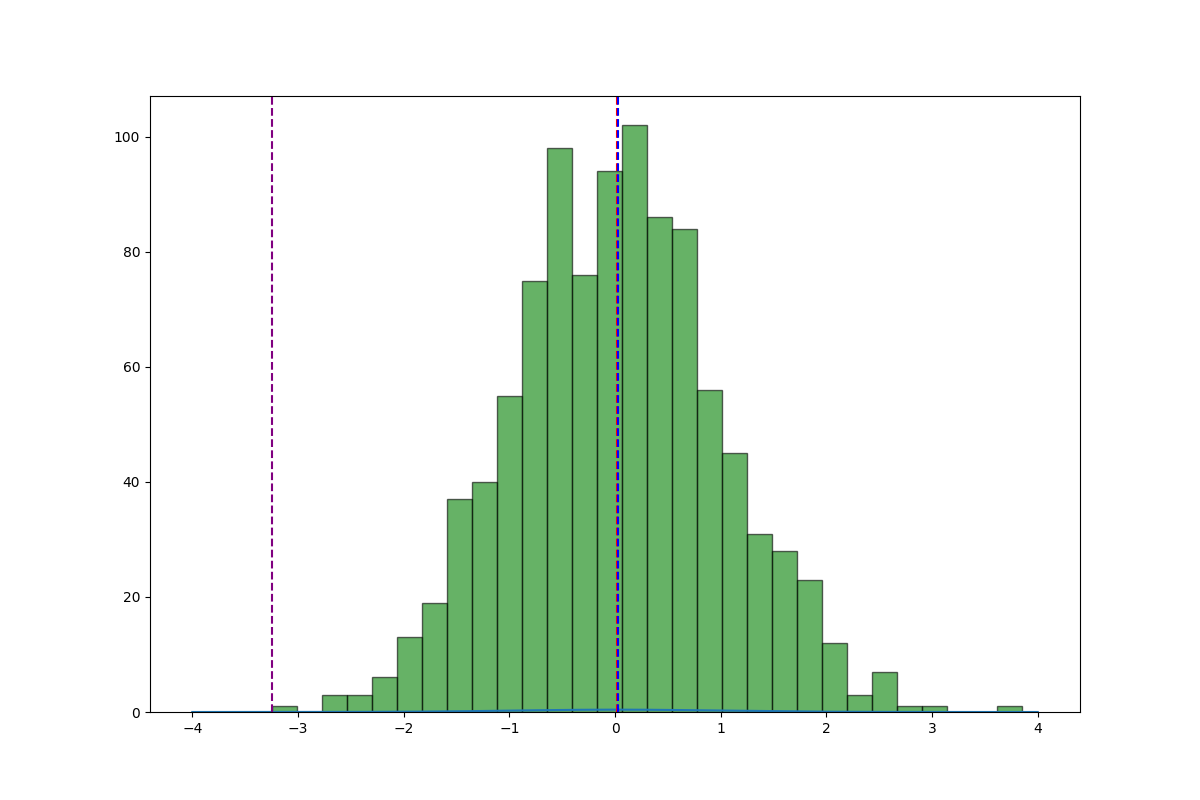

In [21]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(x, y, label=('Normal Distribution'))
ax.hist(data, bins=30, alpha=0.6, color='g', edgecolor='black')

ax.axvline(mean, color='red', linestyle='--', label=f"Mean {mean:.2f}")
ax.axvline(median, color='blue', linestyle='--', label=f"Median {mean:.2f}")
ax.axvline(mode_v, color='purple', linestyle='--', label=f"Mode {mean:.2f}")

# plt.show()
fig.savefig('assets/hist_avg_median.png')

# Symulacja

In [29]:
np.random.seed(42)

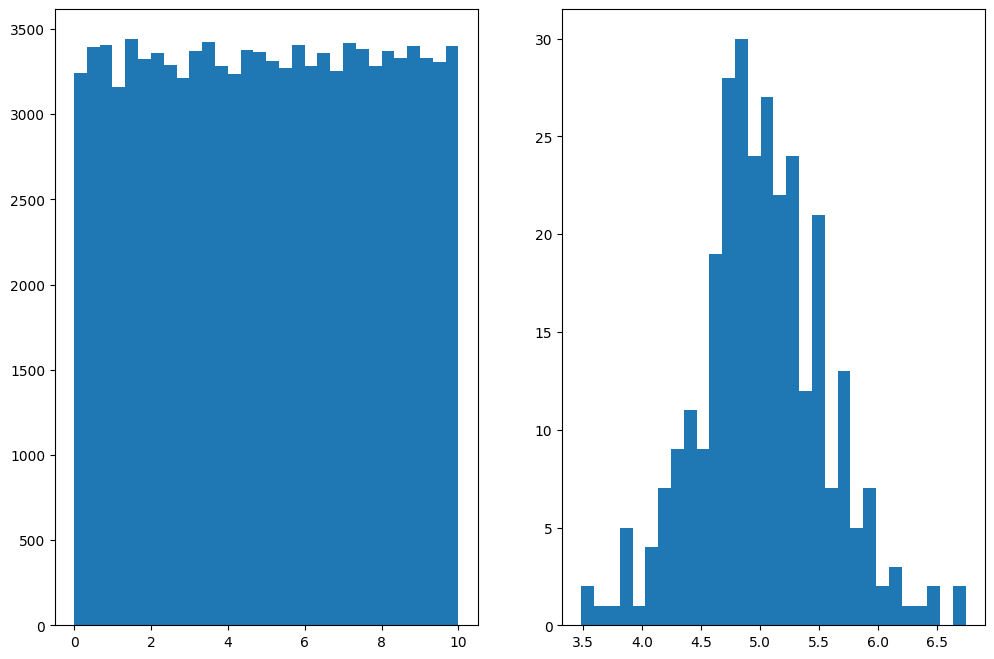

In [31]:
sample_size = 30


original_distribution = np.random.uniform(low=0.0, high=10.0, size=100000)

sample_means = []

for _ in range(300):
    sample = np.random.choice(original_distribution, size=sample_size)
    sample_means.append(np.mean(sample))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

ax1.hist(original_distribution, bins=30)
ax2.hist( sample_means, bins=30)

plt.show()


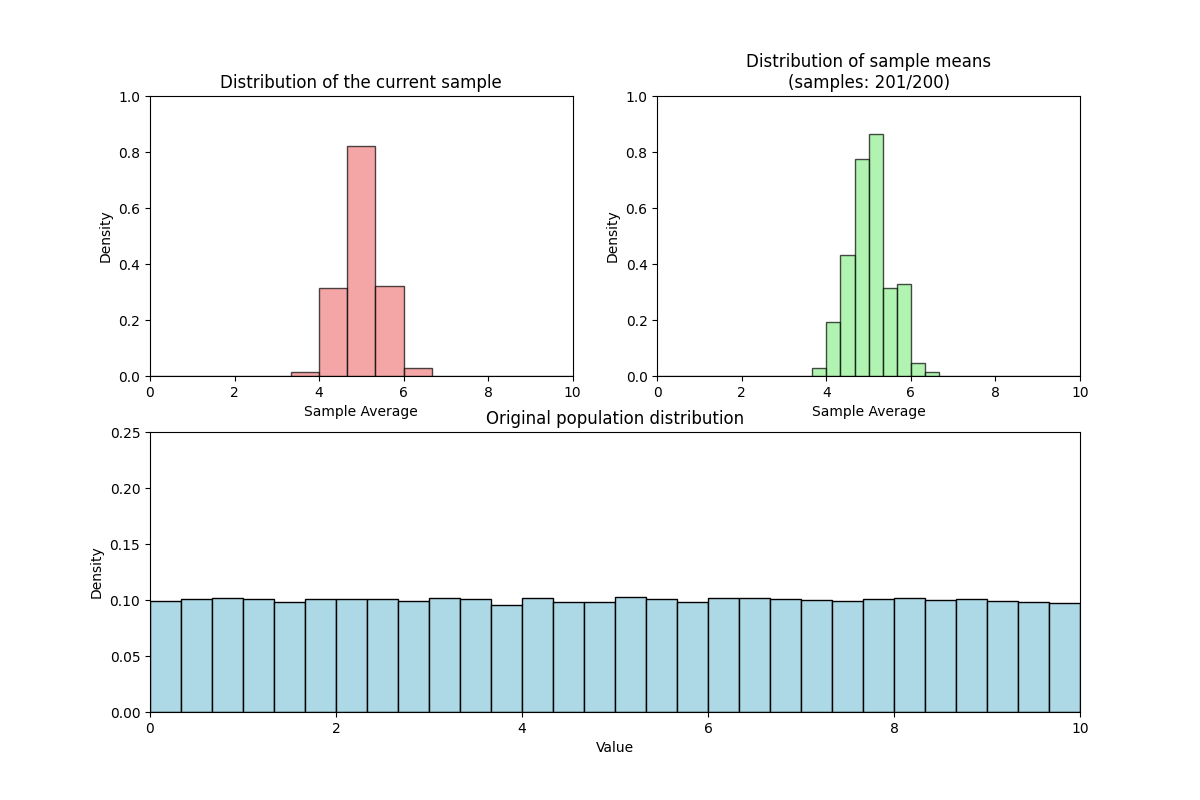

In [24]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from scipy.stats import norm


np.random.seed(42)
sample_size = 30
num_samples = 200
original_distribution = np.random.uniform(0.0, 10.0, 100000)

sample_means = []

fig, axes = plt.subplot_mosaic(
    """
    AB
    CC
    """,
    figsize=(12, 8)
)

ax_sample = axes["A"]
ax_mean = axes["B"]
ax_original = axes["C"]

ax_original.hist(original_distribution, bins=30, range=(0, 10), density=True, edgecolor='black', color='lightblue')
ax_original.set_xlim(0, 10)
ax_original.set_ylim(0, 0.25)
ax_original.set_title("Original population distribution")
ax_original.set_xlabel("Value")
ax_original.set_ylabel("Density")

# current_sample = []

def update(frame):
    current_sample = np.random.choice(original_distribution, size=sample_size)
    sample_means.append(np.mean(current_sample))

    ax_mean.clear()
    ax_mean.hist(sample_means, bins=30, range=(0, 10), density=True, edgecolor='black', color='lightgreen', alpha=0.7)
    ax_mean.set_xlim(0, 10)
    ax_mean.set_ylim(0, 1)
    ax_mean.set_title(f"Distribution of sample means\n(samples: {len(sample_means)}/{num_samples})")
    ax_mean.set_xlabel("Sample Average")
    ax_mean.set_ylabel("Density")


    ax_sample.clear()
    ax_sample.hist(sample_means, bins=15, range=(0, 10), density=True, edgecolor='black', color='lightcoral', alpha=0.7)
    ax_sample.set_xlim(0, 10)
    ax_sample.set_ylim(0, 1)
    ax_sample.set_title(f"Distribution of the current sample")
    ax_sample.set_xlabel("Sample Average")
    ax_sample.set_ylabel("Density")
    
    



anim = FuncAnimation(fig, update, frames=num_samples, interval=100, repeat=False)

anim.save('assets/central_limit_theorem_1.gif', writer=PillowWriter(fps=20))

plt.show()

In [39]:
!uv add ipython

Resolved 114 packages in 1.04s                                       
Audited 109 packages in 0.26ms                                       


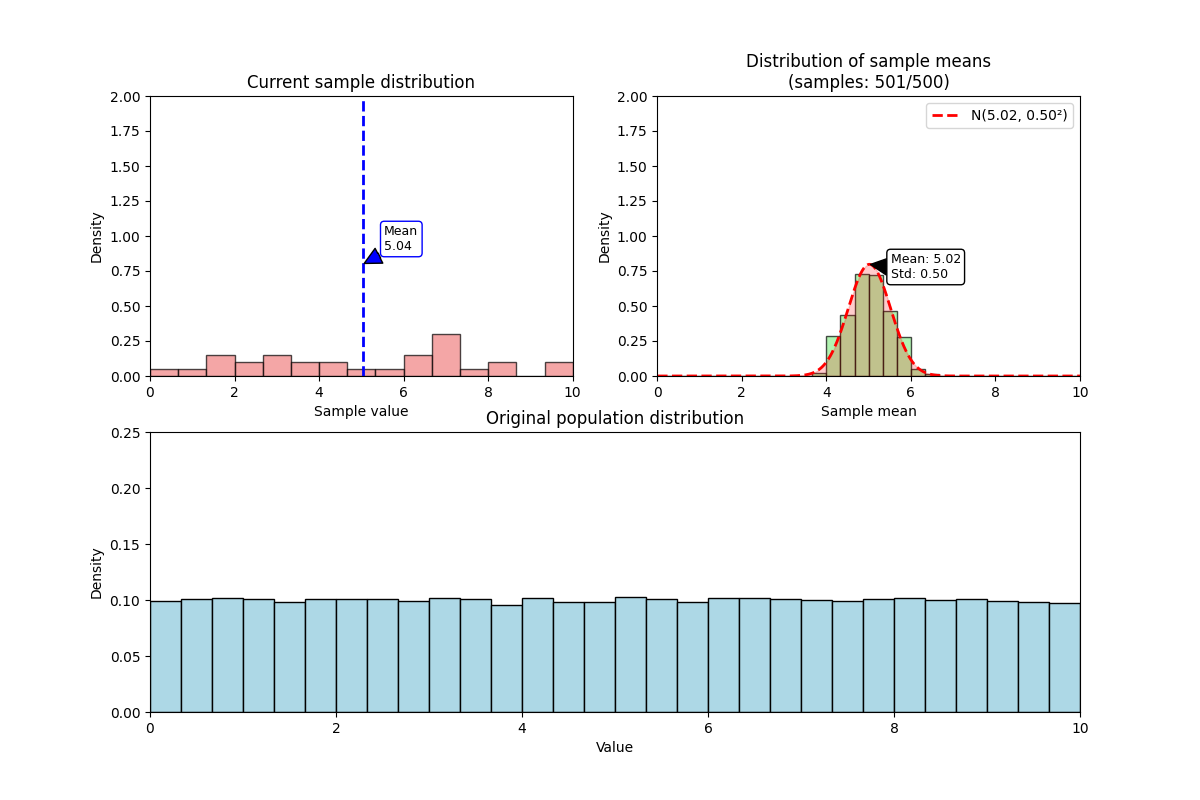

In [30]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from scipy.stats import norm


np.random.seed(42)
sample_size = 30
num_samples = 500
original_distribution = np.random.uniform(0.0, 10.0, 100000)

sample_means = []

fig, axes = plt.subplot_mosaic(
    """
    AB
    CC
    """,
    figsize=(12, 8)
)

ax_sample = axes["A"]
ax_mean = axes["B"]
ax_original = axes["C"]

ax_original.hist(original_distribution, bins=30, range=(0, 10), density=True, edgecolor='black', color='lightblue')
ax_original.set_xlim(0, 10)
ax_original.set_ylim(0, 0.25)
ax_original.set_title("Original population distribution")
ax_original.set_xlabel("Value")
ax_original.set_ylabel("Density")

# current_sample = []

def update(frame):
    current_sample = np.random.choice(original_distribution, size=sample_size)
    sample_means.append(np.mean(current_sample))

    ax_mean.clear()
    ax_mean.hist(sample_means, bins=30, range=(0, 10), density=True, edgecolor='black', color='lightgreen',  alpha=0.7)
    ax_mean.set_xlim(0, 10)
    ax_mean.set_ylim(0, 2)
    ax_mean.set_title(f"Distribution of sample means\n(samples: {len(sample_means)}/{num_samples})")
    ax_mean.set_xlabel("Sample mean")
    ax_mean.set_ylabel("Density")

    if len(sample_means) > 1:
        mu, std = np.mean(sample_means), np.std(sample_means)
        x = np.linspace(0, 10, 500)
        p = norm.pdf(x, mu, std)
        ax_mean.plot(x, p, 'r--', linewidth=2, label=f"N({mu:.2f}, {std:.2f}²)")
        ax_mean.fill_between(x, p, alpha=.2, color='red')
        ax_mean.legend()

        ax_mean.annotate(
            f"Mean: {mu:.2f}\nStd: {std:.2f}",
            xy=(mu, norm.pdf(mu, mu, std)),
            xytext=(mu + 0.5, 0.7),
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=9,
            bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white')
        )


    ax_sample.clear()
    ax_sample.hist(current_sample, bins=15, range=(0, 10), density=True, edgecolor='black', color='lightcoral', alpha=0.7)
    ax_sample.set_xlim(0, 10)
    ax_sample.set_ylim(0, 2)
    ax_sample.set_title(f"Current sample distribution")
    ax_sample.set_xlabel("Sample value")
    ax_sample.set_ylabel("Density")

    current_mean = np.mean(current_sample)
    ax_sample.axvline(current_mean, color='blue', linestyle="--", linewidth=2)
    ax_sample.annotate(
        f"Mean\n{current_mean:.2f}",
        xy=(current_mean, 0.8),
        xytext=(current_mean + 0.5, 0.9),
        arrowprops=dict(facecolor='blue', shrink=0.05),
        fontsize=9,
        bbox=dict(boxstyle='round,pad=0.3', edgecolor='blue', facecolor='white')
    )
    
    



anim = FuncAnimation(fig, update, frames=num_samples, interval=100, repeat=False)

anim.save('assets/central_limit_theorem_2.gif', writer=PillowWriter(fps=20))

plt.show()

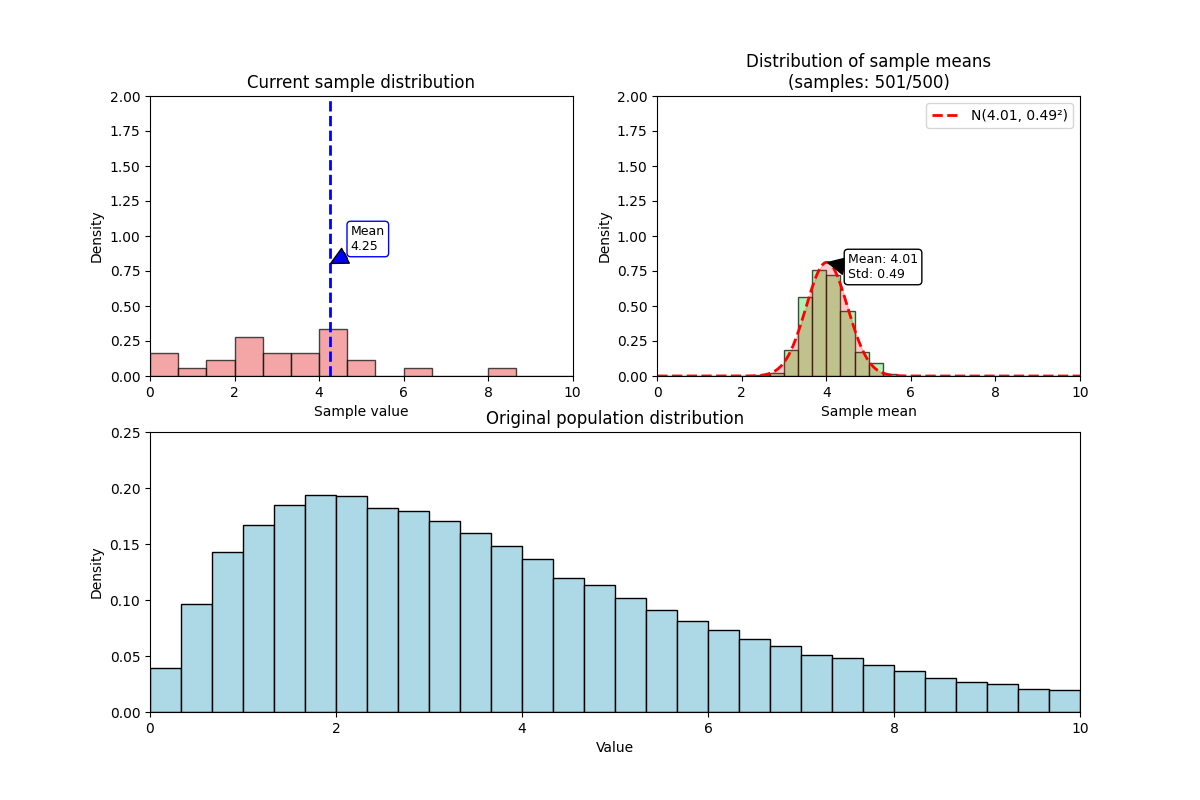

In [31]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from scipy.stats import norm


np.random.seed(42)
sample_size = 30
num_samples = 500
shape = 2.0
scale = 2.0

original_distribution = np.random.gamma(shape=shape, scale=scale, size=100000)

sample_means = []

fig, axes = plt.subplot_mosaic(
    """
    AB
    CC
    """,
    figsize=(12, 8)
)

ax_sample = axes["A"]
ax_mean = axes["B"]
ax_original = axes["C"]

ax_original.hist(original_distribution, bins=30, range=(0, 10), density=True, edgecolor='black', color='lightblue')
ax_original.set_xlim(0, 10)
ax_original.set_ylim(0, 0.25)
ax_original.set_title("Original population distribution")
ax_original.set_xlabel("Value")
ax_original.set_ylabel("Density")

# current_sample = []

def update(frame):
    current_sample = np.random.choice(original_distribution, size=sample_size)
    sample_means.append(np.mean(current_sample))

    ax_mean.clear()
    ax_mean.hist(sample_means, bins=30, range=(0, 10), density=True, edgecolor='black', color='lightgreen',  alpha=0.7)
    ax_mean.set_xlim(0, 10)
    ax_mean.set_ylim(0, 2)
    ax_mean.set_title(f"Distribution of sample means\n(samples: {len(sample_means)}/{num_samples})")
    ax_mean.set_xlabel("Sample mean")
    ax_mean.set_ylabel("Density")

    if len(sample_means) > 1:
        mu, std = np.mean(sample_means), np.std(sample_means)
        x = np.linspace(0, 10, 500)
        p = norm.pdf(x, mu, std)
        ax_mean.plot(x, p, 'r--', linewidth=2, label=f"N({mu:.2f}, {std:.2f}²)")
        ax_mean.fill_between(x, p, alpha=.2, color='red')
        ax_mean.legend()

        ax_mean.annotate(
            f"Mean: {mu:.2f}\nStd: {std:.2f}",
            xy=(mu, norm.pdf(mu, mu, std)),
            xytext=(mu + 0.5, 0.7),
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=9,
            bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white')
        )


    ax_sample.clear()
    ax_sample.hist(current_sample, bins=15, range=(0, 10), density=True, edgecolor='black', color='lightcoral', alpha=0.7)
    ax_sample.set_xlim(0, 10)
    ax_sample.set_ylim(0, 2)
    ax_sample.set_title(f"Current sample distribution")
    ax_sample.set_xlabel("Sample value")
    ax_sample.set_ylabel("Density")

    current_mean = np.mean(current_sample)
    ax_sample.axvline(current_mean, color='blue', linestyle="--", linewidth=2)
    ax_sample.annotate(
        f"Mean\n{current_mean:.2f}",
        xy=(current_mean, 0.8),
        xytext=(current_mean + 0.5, 0.9),
        arrowprops=dict(facecolor='blue', shrink=0.05),
        fontsize=9,
        bbox=dict(boxstyle='round,pad=0.3', edgecolor='blue', facecolor='white')
    )
    
    



anim = FuncAnimation(fig, update, frames=num_samples, interval=100, repeat=False)

anim.save('assets/central_limit_theorem_3.gif', writer=PillowWriter(fps=20))

plt.show()

In [29]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

# 1. Settings
np.random.seed(42)
sample_size = 30
num_frames = 100
original_distribution = np.random.uniform(0.0, 10.0, 100000)

sample_means = []
frame_data = []

# 2. Subplots: layout settings
fig = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {}],
           [{"colspan": 2}, None]],
    subplot_titles=("Sample means distribution", "Current sample distribution", "Original population distribution")
)

# 3. Add initial empty graphs
fig.add_trace(
    go.Histogram(
        x=[],
        nbinsx=30,
        histnorm='probability density',
        marker_color='lightgreen',
        name='Sample means'
    ),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(
        x=[],
        nbinsx=15,
        histnorm='probability density',
        marker_color='lightcoral',
        name='Current sample'
    ),
    row=1, col=2
)

fig.add_trace(
    go.Histogram(
        x=original_distribution,
        nbinsx=30,
        histnorm='probability density',
        marker_color='lightblue',
        name='Original distribution'
    ),
    row=2, col=1
)

# 4. Create animation frames
for frame_idx in range(num_frames):
    current_sample = np.random.choice(original_distribution, size=sample_size)
    sample_means.append(np.mean(current_sample))

    frame = go.Frame(
        data=[
            go.Histogram(
                x=sample_means,
                nbinsx=30,
                histnorm='probability density',
                marker_color='lightgreen'
            ),
            go.Histogram(
                x=current_sample,
                nbinsx=15,
                histnorm='probability density',
                marker_color='lightcoral'
            ),
            go.Histogram(
                x=original_distribution,
                nbinsx=30,
                histnorm='probability density',
                marker_color='lightblue'
            )
        ],
        name=str(frame_idx)
    )
    frame_data.append(frame)

# 5. Basic layout  (without frames!)
fig.update_layout(
    title_text='Central Limit Theorem - Interactive animation',
    width=1000,
    height=800,
    showlegend=False,
    bargap=0.05,
    updatemenus=[{
        "buttons": [
            {
                "label": "Start",
                "method": "animate",
                "args": [None, {"frame": {"duration": 100, "redraw": True},
                                "fromcurrent": True}]
            }
        ],
        "type": "buttons",
        "direction": "left",
        "x": 0.1,
        "y": 1.15
    }]
)

# 6. Load frames separately
fig.frames = frame_data

# 7. Axis settings
fig.update_xaxes(range=[0, 10], row=1, col=1)
fig.update_xaxes(range=[0, 10], row=1, col=2)
fig.update_xaxes(range=[0, 10], row=2, col=1)

fig.update_yaxes(range=[0, 1], row=1, col=1)
fig.update_yaxes(range=[0, 1], row=1, col=2)
fig.update_yaxes(range=[0, 0.25], row=2, col=1)

# 8. Save to HTML file
pio.write_html(fig, file='assets/central_limit_theorem_interactive_for_web.html', auto_open=True)

print("✅ It's ready! The file \"central_limit_theorem_interactive_for_web.html\" will open in your web browser.")

✅ It's ready! The file "central_limit_theorem_interactive_for_web.html" will open in your web browser.
